In [1]:
import json
path = '/home/adrian/Documents/Python/Jupyter/pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [2]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

<AxesSubplot:>

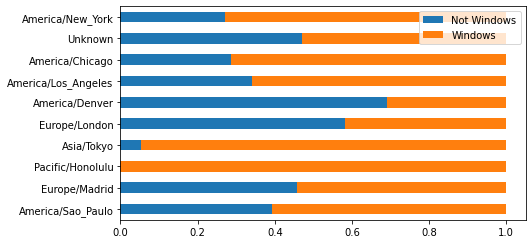

In [91]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

import json
path = '/home/adrian/Documents/Python/Jupyter/pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt'

records = [json.loads(line) for line in open(path)]

timezones = [rec['tz'] for rec in records if 'tz' in rec]
timezones[:10]

frame = DataFrame(records)

clear_tz = frame['tz'].fillna('Missing')

clear_tz[clear_tz == ''] = 'Unknown'

results = [str(x).split() for x in frame.a.dropna()]

cframe = DataFrame(frame[frame.a.notnull()])

op_system = []
for x in cframe['a']:
    if 'Windows' in x or 'windows' in x:
        op_system.append('Windows')
    else:
        op_system.append('Not Windows')

# op_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

by_tz = cframe.groupby(['tz', op_system])

aggregate = by_tz.size().unstack().fillna(0)
indices = [ind for ind in aggregate.index]
indices[indices == ''] = 'Unknown'
aggregate.index = indices

indexer = aggregate.sum(1).argsort()
count_subset = aggregate.take(indexer)[-10:]

norm_subset = count_subset.div(count_subset.sum(1), axis=0)
norm_subset.plot(kind='barh', stacked=True)




# operating_system.value_counts().plot(kind='barh')



In [102]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

path_1 = '/home/adrian/Documents/Python/Jupyter/pydata-book/ch02/movielens/movies.dat'
path_2 = '/home/adrian/Documents/Python/Jupyter/pydata-book/ch02/movielens/ratings.dat'
path_3 = '/home/adrian/Documents/Python/Jupyter/pydata-book/ch02/movielens/users.dat'

mnames = ['movie id', 'movie name', 'movie genre']
movies = pd.read_table(path_1, sep='::', header=None, names=mnames, engine='python')

rnames = ['user id', 'movie id', 'rating', 'timestamp']
ratings = pd.read_table(path_2, sep='::', header=None, names=rnames, engine='python')

users = ['user id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(path_3, sep='::', header=None, names=unames, engine='python')
users[:5]


NameError: name 'unames' is not defined